# Project 3 - Reddit Classification: Powerlifting vs. Bodybuilding

# Modeling and Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.exceptions import ConvergenceWarning
import warnings

In [2]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
data = pd.read_csv('data/subreddit_all_text.csv')

In [4]:
data

,subreddit,all_text
0,1,My 64 yr old mom breaking RPS 60-64 age/198 lb...
1,1,Lifter with Cerebral Palsy. This is what power...
2,1,Hafthor Bjornsson deadlifts 501kg
3,1,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ..."
4,1,A true power lifter
...,...,...
1985,2,Super happy with a gold and silver at my first...
1986,2,Light weight!
1987,2,"Seen a lot of freaks on the sub latley, so her..."
1988,2,"Classic Physique Athlete Corey Becker, beginni..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  1990 non-null   int64 
 1   all_text   1990 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.2+ KB


## LogisticRegression with CountVectorizer

In [6]:
X = data['all_text']
y = data['subreddit']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [8]:
stop_words = list(text.ENGLISH_STOP_WORDS.union(['https', 'com', 'nbsp', 'www', 'just', 've', 'like', 'really', 'new', 'good', 'did']))

In [9]:
pipe = Pipeline([
    ('cvect', CountVectorizer(stop_words=stop_words)),
    ('logreg', LogisticRegression())
])

pipe

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'enough', 'at', 'even', 'latterly',
                                             'once', 'first', 'becomes',
                                             'others', 'nbsp', 'whether',
                                             'much', 'really', 'often',
                                             'everything', 'below', 'noone',
                                             'sixty', 'former', 'whose', 'but',
                                             'per', 'thereupon', 'detail',
                                             'most', 'please', 'beforehand', ...])),
                ('logreg', LogisticRegression())])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'enough', 'at', 'even', 'latterly',
                                             'once', 'first', 'becomes',
                                             'others', 'nbsp', 'whether',
                                             'much', 'really', 'often',
                                             'everything', 'below', 'noone',
                                             'sixty', 'former', 'whose', 'but',
                                             'per', 'thereupon', 'detail',
                                             'most', 'please', 'beforehand', ...])),
                ('logreg', LogisticRegression())])

In [11]:
pipe.score(X_train, y_train)

0.9949748743718593

In [12]:
pipe.score(X_test, y_test)

0.9623115577889447

In [13]:
pipe_coef = pipe[1].coef_[0]
pipe_coef

array([-6.26716210e-02, -3.66974732e-01, -1.33245673e-01, ...,
       -1.28087405e-06, -3.62566335e-06,  1.74992769e-02])

In [14]:
pipe_features = pipe[:-1].get_feature_names_out()
pipe_features

array(['000', '000kcal', '000lb', ..., 'zknuh5g8tlm', 'zone', 'zyzz'],
      dtype=object)

In [15]:
len(pipe_coef)

8145

In [16]:
len(pipe_features)

8145

In [17]:
pipe_coef_features = pd.DataFrame(zip(pipe_coef, pipe_features))

In [18]:
pipe_coef_features.sort_values(by=0, ascending=False).head(20)

,0,1
7922,1.873236,weeks
1731,1.641934,arnold
2081,1.374617,bodybuilding
5515,1.299506,olympia
2079,1.270793,bodybuilder
5770,1.245414,physique
4909,1.206057,looking
2938,1.048920,days
2496,0.968386,classic
7711,0.938538,update


In [19]:
pipe_coef_features.sort_values(by=0, ascending=False).tail(20)

,0,1
7139,-1.115405,strength
5096,-1.124908,meet
7738,-1.143495,uspa
5911,-1.169046,powerlifter
5921,-1.174844,pr
6097,-1.194816,pull
7516,-1.203904,total
7520,-1.225182,totals
1010,-1.269806,5kg
4476,-1.338332,ipf


## LogisticRegression with CountVectorizer (GridSearchCV)

In [20]:
param_grid = {
    'cvect__max_features': [None, 1000, 5000, 10000],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvect__stop_words': [None, 'english', stop_words],
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please',
                                                                    'beforehand', ...])),
                                       ('logreg', Logis...
                         'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvect__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'enough', 'at', 'even',
                                                'latterly', 'once', 'first',
                                                'becomes', 'others', 'nbsp',
                                                'whether', 'much', 'really',
                                                'often', 'everything', 'below',
                                                'noone', 'sixty', 'former',
                                                'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', 'beforehand', ...]],
                         'logreg__C': [0.01, 0.1, 1, 10, 100]})

In [22]:
grid_search.best_params_

{'cvect__max_features': 10000,
 'cvect__ngram_range': (1, 3),
 'cvect__stop_words': 'english',
 'logreg__C': 10}

In [23]:
grid_search.score(X_train, y_train)

0.9981155778894473

In [24]:
grid_search.score(X_test, y_test)

0.957286432160804

In [25]:
preds = grid_search.predict(X_test)

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

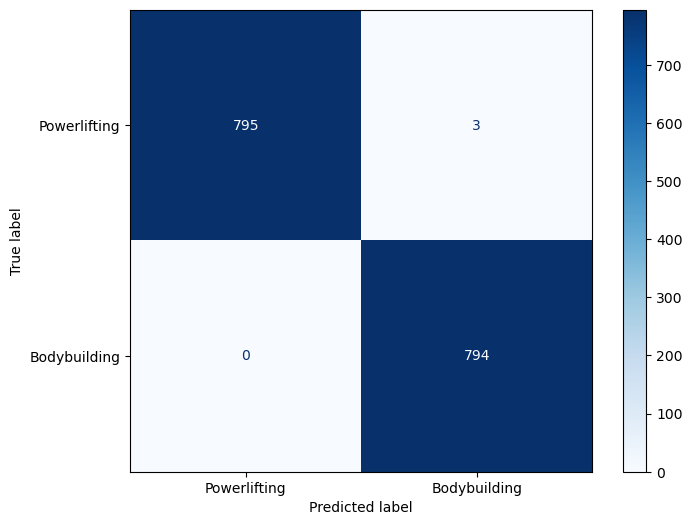

In [27]:
# display confusion matrix for train data
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(grid_search, X_train, y_train, cmap='Blues', ax=ax, display_labels=['Powerlifting', 'Bodybuilding']);

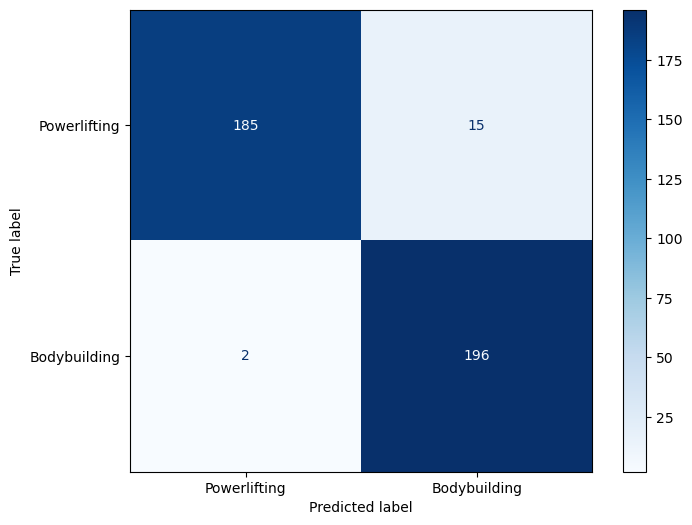

In [28]:
# display confusion matrix for test data
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap='Blues', ax=ax, display_labels=['Powerlifting', 'Bodybuilding']);

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.99      0.93      0.96       200
           2       0.93      0.99      0.96       198

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



## LogisticRegression with CountVectorizer (added stop words)

In [30]:
# added more stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(['https', 'com', 'nbsp', 'www', 'just', 've', 'like', 'really', 'new', 'good', 'did', 'bodybuilding', 'bodybuilder', 'powerlifting', 'powerlifter']))

In [31]:
pipe = Pipeline([
    ('cvect', CountVectorizer(stop_words=stop_words)),
    ('logreg', LogisticRegression())
])

pipe

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('logreg', LogisticRegression())])

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('logreg', LogisticRegression())])

In [33]:
pipe.score(X_train, y_train)

0.9943467336683417

In [34]:
pipe.score(X_test, y_test)

0.9422110552763819

In [35]:
pipe_coef = pipe[1].coef_[0]
pipe_coef

array([-4.61819967e-02, -3.80424419e-01, -1.30103159e-01, ...,
       -5.29530420e-07, -1.45969077e-06,  1.69906817e-02])

In [36]:
pipe_features = pipe[:-1].get_feature_names_out()
pipe_features

array(['000', '000kcal', '000lb', ..., 'zknuh5g8tlm', 'zone', 'zyzz'],
      dtype=object)

In [37]:
pipe_coef_features = pd.DataFrame(zip(pipe_coef, pipe_features))

In [38]:
pipe_coef_features.sort_values(by=0, ascending=False).head(20)

,0,1
7918,1.946493,weeks
1731,1.672588,arnold
5513,1.343602,olympia
5768,1.310454,physique
4907,1.247110,looking
2936,1.078049,days
2494,0.954601,classic
7707,0.948901,update
3985,0.907263,guy
4614,0.899034,kai


In [39]:
pipe_coef_features.sort_values(by=0, ascending=False).tail(20)

,0,1
7135,-1.051028,strength
8054,-1.061054,wraps
7734,-1.111063,uspa
5917,-1.138543,pr
7512,-1.154846,total
6093,-1.171521,pull
2303,-1.177331,candito
7516,-1.199664,totals
1010,-1.208706,5kg
4474,-1.381203,ipf


## LogisticRegression with CountVectorizer (GridSearchCV, added stop words)

In [40]:
param_grid = {
    'cvect__max_features': [None, 1000, 5000, 10000],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvect__stop_words': [None, 'english', stop_words],
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [41]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'bodybuilder',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please', ...])),
                                       ('logreg', Logi...
                         'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvect__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'bodybuilder', 'enough', 'at',
                                                'even', 'latterly', 'once',
                                                'first', 'becomes', 'others',
                                                'nbsp', 'whether', 'much',
                                                'really', 'often', 'everything',
                                                'below', 'noone', 'sixty',
                                                'former', 'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', ...]],
                         'logreg__C': [0.01, 0.1, 1, 10, 100]})

In [42]:
grid_search.best_params_

{'cvect__max_features': 10000,
 'cvect__ngram_range': (1, 3),
 'cvect__stop_words': 'english',
 'logreg__C': 10}

In [43]:
grid_search.score(X_train, y_train)

0.9981155778894473

In [44]:
grid_search.score(X_test, y_test)

0.957286432160804

In [45]:
preds = grid_search.predict(X_test)

In [46]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

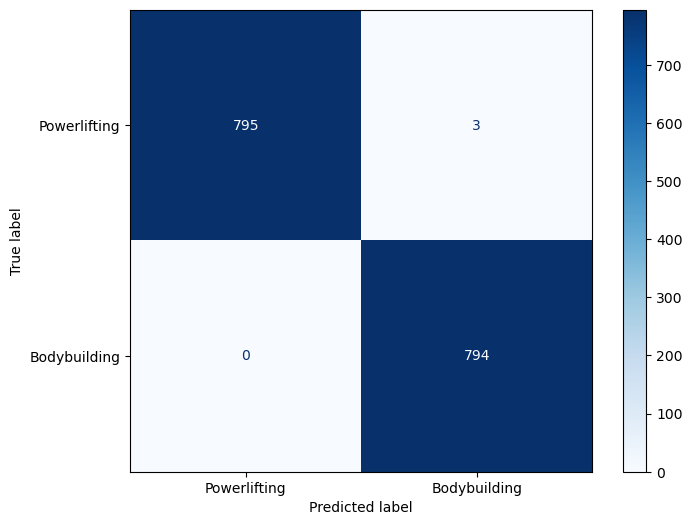

In [47]:
# display confusion matrix for train data
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(grid_search, X_train, y_train, cmap='Blues', ax=ax, display_labels=['Powerlifting', 'Bodybuilding']);

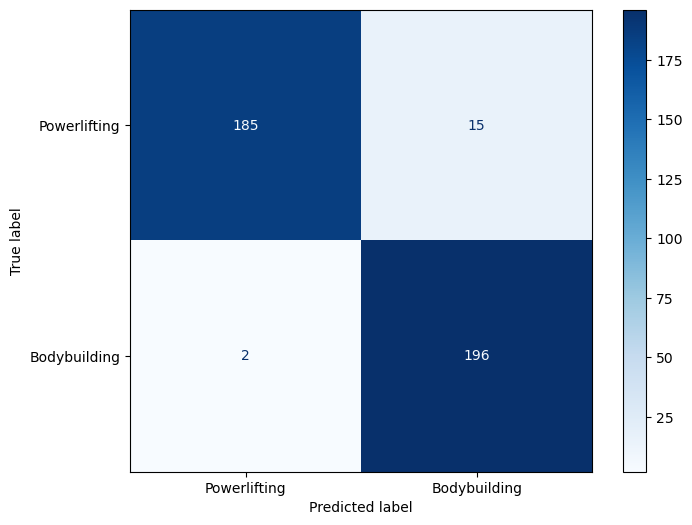

In [48]:
# display confusion matrix for test data
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap='Blues', ax=ax, display_labels=['Powerlifting', 'Bodybuilding']);

In [49]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.99      0.93      0.96       200
           2       0.93      0.99      0.96       198

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



## LogisticRegression with TfidfVectorizer

In [50]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('logreg', LogisticRegression())
])
pipe

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('logreg', LogisticRegression())])

In [51]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('logreg', LogisticRegression())])

In [52]:
pipe.score(X_train, y_train)

0.9880653266331658

In [53]:
pipe.score(X_test, y_test)

0.9346733668341709

In [54]:
pipe_coef = pipe[1].coef_[0]
pipe_coef

array([-1.24977014e-01, -2.35829875e-01, -1.29552402e-01, ...,
       -2.03001100e-04, -2.87843102e-02,  7.83275900e-02])

In [55]:
pipe_features = pipe[:-1].get_feature_names_out()
pipe_features

array(['000', '000kcal', '000lb', ..., 'zknuh5g8tlm', 'zone', 'zyzz'],
      dtype=object)

In [56]:
pipe_coef_features = pd.DataFrame(zip(pipe_coef, pipe_features))

In [57]:
pipe_coef_features.sort_values(by=0, ascending=False).head(20)

,0,1
7918,3.336061,weeks
1731,2.869893,arnold
5768,2.285846,physique
5513,2.011237,olympia
4907,2.005444,looking
2494,1.780441,classic
2936,1.673809,days
5996,1.482860,pro
7483,1.211358,today
7707,1.197856,update


In [58]:
pipe_coef_features.sort_values(by=0, ascending=False).tail(20)

,0,1
8054,-1.200434,wraps
4406,-1.213890,instagram
2238,-1.239259,bw
3996,-1.282364,haack
5917,-1.649155,pr
6250,-1.691291,record
7512,-1.722416,total
4474,-1.771467,ipf
5094,-1.774605,meet
1983,-1.830240,benches


## LogisticRegression with TfidfVectorizer (GridSearchCV)

In [59]:
param_grid = {
    'tfidf__max_features': [None, 1000, 5000, 10000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__stop_words': [None, 'english', stop_words],
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'bodybuilder',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please', ...])),
                                       ('logreg', Logi...
                         'tfidf__max_features': [None, 1000, 5000, 10000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'tfidf__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'bodybuilder', 'enough', 'at',
                                                'even', 'latterly', 'once',
                                                'first', 'becomes', 'others',
                                                'nbsp', 'whether', 'much',
                                                'really', 'often', 'everything',
                                                'below', 'noone', 'sixty',
                                                'former', 'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', ...]]})

In [61]:
grid_search.best_params_

{'logreg__C': 100,
 'tfidf__max_features': None,
 'tfidf__ngram_range': (1, 3),
 'tfidf__stop_words': 'english'}

In [62]:
grid_search.score(X_train, y_train)

1.0

In [63]:
grid_search.score(X_test, y_test)

0.9547738693467337

In [64]:
preds = grid_search.predict(X_test)

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

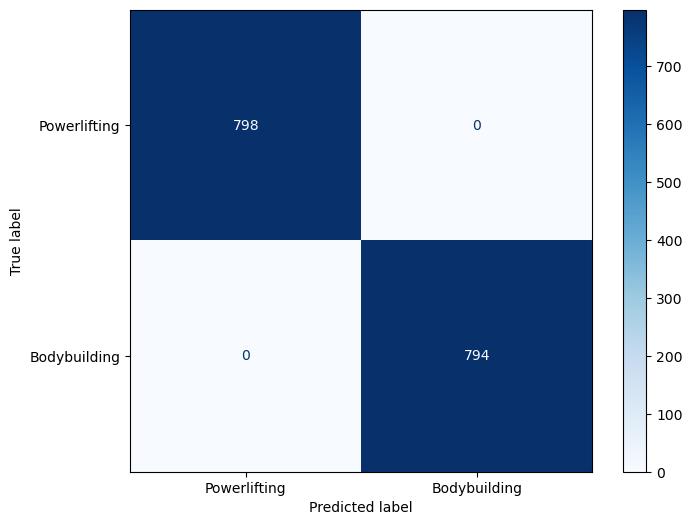

In [66]:
# display confusion matrix for train data
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(grid_search, X_train, y_train, cmap='Blues', ax=ax, display_labels=['Powerlifting', 'Bodybuilding']);

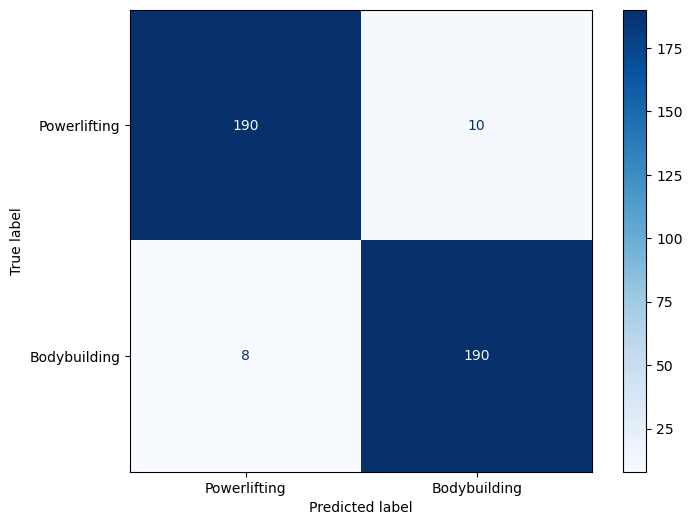

In [67]:
# display confusion matrix for test data
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap='Blues', ax=ax, display_labels=['Powerlifting', 'Bodybuilding']);

In [68]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.96      0.95      0.95       200
           2       0.95      0.96      0.95       198

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



## KNN with CountVectorizer

In [69]:
pipe = Pipeline([
    ('cvect', CountVectorizer(stop_words=stop_words)),
    ('scaler', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier())
])

pipe

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('scaler', StandardScaler(with_mean=False)),
                ('knn', KNeighborsClassifier())])

In [70]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('scaler', StandardScaler(with_mean=False)),
                ('knn', KNeighborsClassifier())])

In [71]:
pipe.score(X_train, y_train)

0.6827889447236181

In [72]:
pipe.score(X_test, y_test)

0.5829145728643216

## KNN with CountVectorizer (GridSearchCV)

In [73]:
param_grid = {
    'cvect__max_features': [None, 1000, 5000, 10000],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvect__stop_words': [None, 'english', stop_words],
    'knn__n_neighbors': [3, 5, 7, 9]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [74]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'bodybuilder',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please', ...])),
                                       ('scaler',
                                        Stan...
                         'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvect__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'bodybuilder', 'enough', 'at',
                                                'even', 'latterly', 'once',
                                                'first', 'becomes', 'others',
                                                'nbsp', 'whether', 'much',
                                                'really', 'often', 'everything',
                                                'below', 'noone', 'sixty',
                                                'former', 'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', ...]],
                         'knn__n_neighbors': [3, 5, 7, 9]})

In [75]:
grid_search.best_params_

{'cvect__max_features': 1000,
 'cvect__ngram_range': (1, 1),
 'cvect__stop_words': ['further',
  'move',
  'many',
  'he',
  'bodybuilder',
  'enough',
  'at',
  'even',
  'latterly',
  'once',
  'first',
  'becomes',
  'others',
  'nbsp',
  'whether',
  'much',
  'really',
  'often',
  'everything',
  'below',
  'noone',
  'sixty',
  'former',
  'whose',
  'but',
  'per',
  'thereupon',
  'detail',
  'most',
  'please',
  'beforehand',
  'someone',
  'indeed',
  'mostly',
  'five',
  'somehow',
  'however',
  'seemed',
  'hasnt',
  'was',
  'whence',
  'get',
  'us',
  'we',
  'due',
  'becoming',
  'been',
  'hundred',
  'beside',
  'anything',
  'hereafter',
  'third',
  'each',
  'bottom',
  'from',
  'her',
  'hereupon',
  'again',
  'him',
  'moreover',
  'for',
  'must',
  'throughout',
  'via',
  'next',
  'two',
  'could',
  'con',
  'whereupon',
  'amount',
  'here',
  'by',
  'few',
  'couldnt',
  'when',
  'off',
  'go',
  'and',
  'any',
  'down',
  'in',
  'whom',
  'anyw

In [76]:
grid_search.score(X_train, y_train)

0.9126884422110553

In [77]:
grid_search.score(X_test, y_test)

0.8693467336683417

## RandomForest with CountVectorizer

In [78]:
pipe = Pipeline([
    ('cvect', CountVectorizer(stop_words=stop_words)),
    ('rf', RandomForestClassifier())
])

pipe

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('rf', RandomForestClassifier())])

In [79]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('rf', RandomForestClassifier())])

In [80]:
pipe.score(X_train, y_train)

1.0

In [81]:
pipe.score(X_test, y_test)

0.9396984924623115

## RandomForest with CountVectorizer (GridSearchCV)

In [82]:
param_grid = {
    'cvect__max_features': [None, 1000, 5000, 10000],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvect__stop_words': [None, 'english', stop_words],
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [83]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'bodybuilder',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please', ...])),
                                       ('rf', RandomFo...
                         'cvect__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'bodybuilder', 'enough', 'at',
                                                'even', 'latterly', 'once',
                                                'first', 'becomes', 'others',
                                                'nbsp', 'whether', 'much',
                                                'really', 'often', 'everything',
                                                'below', 'noone', 'sixty',
                                                'former', 'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', ...]],
                         'rf__max_depth': [None, 10, 20],
                         'rf__n_estimators': [100, 200]})

In [84]:
grid_search.best_params_

{'cvect__max_features': 5000,
 'cvect__ngram_range': (1, 2),
 'cvect__stop_words': 'english',
 'rf__max_depth': None,
 'rf__n_estimators': 200}

In [85]:
grid_search.score(X_train, y_train)

0.9981155778894473

In [86]:
grid_search.score(X_test, y_test)

0.9623115577889447

## SVC with CountVectorizer

In [87]:
pipe = Pipeline([
    ('cvect', CountVectorizer(stop_words=stop_words)),
    ('scaler', StandardScaler(with_mean=False)),
    ('svm', SVC())
])

pipe

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('scaler', StandardScaler(with_mean=False)), ('svm', SVC())])

In [88]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('scaler', StandardScaler(with_mean=False)), ('svm', SVC())])

In [89]:
pipe.score(X_train, y_train)

0.9459798994974874

In [90]:
pipe.score(X_test, y_test)

0.7763819095477387

## SVC with CountVectorizer (GridSearchCV)

In [91]:
param_grid = {
    'cvect__max_features': [None, 1000, 5000, 10000],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvect__stop_words': [None, 'english', stop_words],
    'svm__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [92]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'bodybuilder',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please', ...])),
                                       ('scaler',
                                        Stan...
                         'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvect__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'bodybuilder', 'enough', 'at',
                                                'even', 'latterly', 'once',
                                                'first', 'becomes', 'others',
                                                'nbsp', 'whether', 'much',
                                                'really', 'often', 'everything',
                                                'below', 'noone', 'sixty',
                                                'former', 'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', ...]],
                         'svm__C': [0.01, 0.1, 1, 10, 100]})

In [93]:
grid_search.best_params_

{'cvect__max_features': 1000,
 'cvect__ngram_range': (1, 3),
 'cvect__stop_words': 'english',
 'svm__C': 100}

In [94]:
grid_search.score(X_train, y_train)

0.9842964824120602

In [95]:
grid_search.score(X_test, y_test)

0.9346733668341709

## Naive Bayes with CountVectorizer

In [96]:
pipe = Pipeline([
    ('cvect', CountVectorizer(stop_words=stop_words)),
    ('nb', MultinomialNB())
])

pipe

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('nb', MultinomialNB())])

In [97]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(stop_words=['further', 'move', 'many', 'he',
                                             'bodybuilder', 'enough', 'at',
                                             'even', 'latterly', 'once',
                                             'first', 'becomes', 'others',
                                             'nbsp', 'whether', 'much',
                                             'really', 'often', 'everything',
                                             'below', 'noone', 'sixty',
                                             'former', 'whose', 'but', 'per',
                                             'thereupon', 'detail', 'most',
                                             'please', ...])),
                ('nb', MultinomialNB())])

In [98]:
pipe.score(X_train, y_train)

0.9660804020100503

In [99]:
pipe.score(X_test, y_test)

0.8894472361809045

## Naive Bayes with CountVectorizer (GridSearchCV)

In [100]:
param_grid = {
    'cvect__max_features': [None, 1000, 5000, 10000],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'cvect__stop_words': [None, 'english', stop_words],
    'nb__alpha': [0.1, 0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [101]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvect',
                                        CountVectorizer(stop_words=['further',
                                                                    'move',
                                                                    'many',
                                                                    'he',
                                                                    'bodybuilder',
                                                                    'enough',
                                                                    'at',
                                                                    'even',
                                                                    'latterly',
                                                                    'once',
                                                                    'first',
                                                                    'becomes',
                                                                    'others',
                                                                    'nbsp',
                                                                    'whether',
                                                                    'much',
                                                                    'really',
                                                                    'often',
                                                                    'everything',
                                                                    'below',
                                                                    'noone',
                                                                    'sixty',
                                                                    'former',
                                                                    'whose',
                                                                    'but',
                                                                    'per',
                                                                    'thereupon',
                                                                    'detail',
                                                                    'most',
                                                                    'please', ...])),
                                       ('nb', Multinom...
                         'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvect__stop_words': [None, 'english',
                                               ['further', 'move', 'many', 'he',
                                                'bodybuilder', 'enough', 'at',
                                                'even', 'latterly', 'once',
                                                'first', 'becomes', 'others',
                                                'nbsp', 'whether', 'much',
                                                'really', 'often', 'everything',
                                                'below', 'noone', 'sixty',
                                                'former', 'whose', 'but', 'per',
                                                'thereupon', 'detail', 'most',
                                                'please', ...]],
                         'nb__alpha': [0.1, 0.5, 1.0, 2.0]})

In [102]:
grid_search.best_params_

{'cvect__max_features': 5000,
 'cvect__ngram_range': (1, 2),
 'cvect__stop_words': 'english',
 'nb__alpha': 0.5}

In [103]:
grid_search.score(X_train, y_train)

0.967964824120603

In [104]:
grid_search.score(X_test, y_test)

0.9045226130653267